#Problema 5 Guía 1
###F2A - 1er cuatrimestre 2021

Este colab tiene la finalidad de mostrar algunos gráficos y animaciones que acompañan a la resolución del ejercicio 5 Guía 1.
Agradecemos a Josefina Catoni por la base del código. Realizado por Candela Szischik.

##Movimiento de las masas

Vamos a considerar las *masas iguales*, queda como ejercicio adaptar el código para dos masas distintas.

In [ ]:
#Importamos algunas librerías útiles
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc # librería de animaciones
rc('animation', html='html5') #para poder ver la animacion en formato inline
from IPython.display import HTML


In [ ]:
#Definimos los parámetros del problema
g = 9.81
L = 0.5
m = 1.0 #masas iguales
k = 0.9

Tenemos *dos grados de libertad* en el problema, por lo que esperábamos tener **dos modos**. Uno de ellos se corresponde con no excitar el resorte y el otro a las masitas en contrafase.

**Modo 1:** 
$\omega_1 = \sqrt{\frac{g}{L}}$, $v_1 = \binom{1}{1}$

**Modo 2:**
$\omega_2 = \sqrt{\frac{g}{L}+ \frac{2k}{m}}$, $v_2 = \binom{1}{-1}$

In [ ]:
#Definimos las frecuencias de los modos
#Modo 1: frecuencia más baja
w1 = np.sqrt(g/L) #Es la frecuencia de un péndulo

#Modo 2:
w2 = np.sqrt(g/L+2*k/m) #aparece la información del resorte, es el modo en contrafase

Primero veamos gráficamente cómo es la oscilación cuando estamos en cada uno de los modos. 

**MODO 1:**

In [ ]:
#Veamos como es la oscilación en el modo 1. Las dos masas están en fase:
t=np.linspace(0,2*np.pi/w1,1000) #defino el vector de tiempos
psi_a1 = 0.05*np.cos(w1*t) #Solución modo 1 para la masa a
psi_b1 = 0.05*np.cos(w1*t) #Solución modo 1 para la masa b

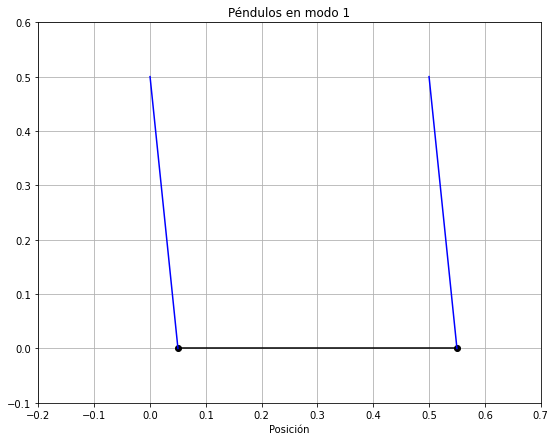

In [ ]:
var1=psi_a1 #variable que quiero animar
var2=psi_b1 #variable que quiero animar

fig, ax = plt.subplots(figsize=(9,7));

ax.set_xlim(-0.2,0.7);
ax.set_ylim(-0.1,0.6);
plt.xlabel('Posición');
plt.title('Péndulos en modo 1');

line1, = ax.plot([], [],'ok-');
line2, = ax.plot([], [],'b-');
line3, = ax.plot([], [],'b-');

plt.grid();


def animate(i):
    X = [var1[i],0.5+var2[i]] #lo =0.5
    Y = [0,0]
    line1.set_data(X,Y)
    line2.set_data([0,var1[i]],[0.5,0])
    line3.set_data([0.5,0.5+var2[i]],[L,0])
    return (line1,line2,line3)
  
anim2 = animation.FuncAnimation(fig, animate, frames=len(t), interval=2*np.pi/w1);

anim2

In [ ]:
print(type(line1))

<class 'matplotlib.lines.Line2D'>


Vemos que al estar en fase el resorte no se estira ni se comprime, tiene sentido que no aparezca en la frecuencia del modo el k.

Veamos ahora cómo oscila el sistema en el **modo 2:**

In [ ]:
t=np.linspace(0,2*np.pi/w2,1000) #defino el vector de tiempos
psi_a2 = 0.05*np.cos(w2*t) #Solución modo 2 para la masa a
psi_b2 = -0.05*np.cos(w2*t) #Solución modo 2 para la masa b

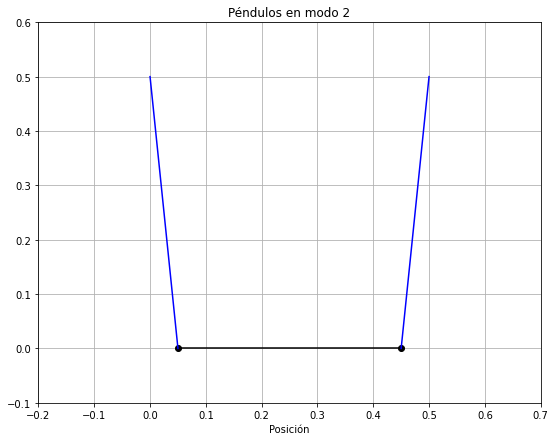

In [ ]:
var1=psi_a2 #variable que quiero animar
var2=psi_b2 #variable que quiero animar

fig, ax = plt.subplots(figsize=(9,7));

ax.set_xlim(-0.2,0.7);
ax.set_ylim(-0.1,0.6);
plt.xlabel('Posición');
plt.title('Péndulos en modo 2');

line1, = ax.plot([], [],'ok-');
line2, = ax.plot([], [],'b-');
line3, = ax.plot([], [],'b-');

plt.grid();


def animate(i):
    X = [var1[i],0.5+var2[i]]
    Y = [0,0]
    line1.set_data(X,Y)
    line2.set_data([0,var1[i]],[L,0])
    line3.set_data([0.5,0.5+var2[i]],[L,0])
    return (line1,line2,line3)
  
anim2 = animation.FuncAnimation(fig, animate, frames=len(t), interval=2*np.pi/w2);

anim2

Para oscilar en contrafase el resorte tiene que estirarse y comprimirse. 
Notar que en los dos modos, como esperamos, las dos masas pasan por la posición de equilibrio al mismo tiempo.

Veamos una solución general, que puede escribirse como una combinación lineal de los dos modos. Pueden probar otras combinaciones.

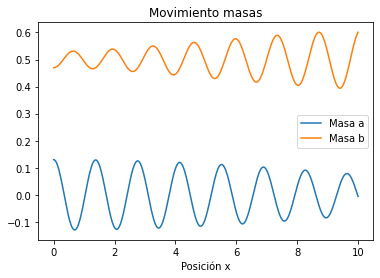

In [ ]:
t=np.linspace(0,10,1000) #defino el vector de tiempos
psi_a = 0.05*np.cos(w1*t) + 0.08*np.cos(w2*t) #masa a
psi_b = 0.05*np.cos(w1*t) - 0.08*np.cos(w2*t)  #masa b
plt.plot(t,psi_a, label = "Masa a")
plt.plot(t,psi_b + 0.5, label = "Masa b")
plt.xlabel("Tiempo")
plt.xlabel("Posición x")
plt.legend()
plt.title("Movimiento masas")
plt.show()


Notar que el movimiento de casa masa no está descrita por un coseno o seno sino por la suma. Veamos cómo es el movimiento de los péndulos.

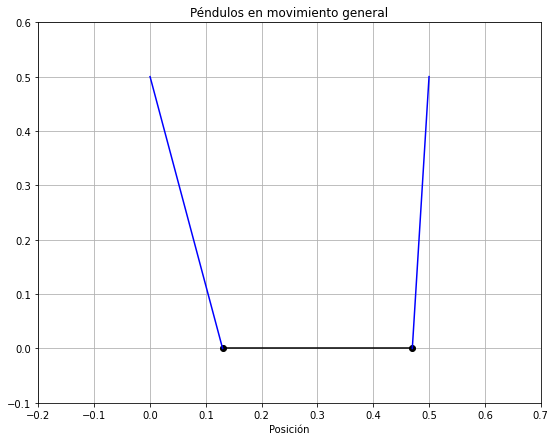

In [ ]:
t=np.linspace(0,2*np.pi/w2,1000) #defino el vector de tiempos
psi_a = 0.05*np.cos(w1*t) + 0.08*np.cos(w2*t) #masa a
psi_b = 0.05*np.cos(w1*t) - 0.08*np.cos(w2*t)  #masa b
var1=psi_a #variable que quiero animar
var2=psi_b #variable que quiero animar

fig, ax = plt.subplots(figsize=(9,7));

ax.set_xlim(-0.2,0.7);
ax.set_ylim(-0.1,0.6);
plt.xlabel('Posición');
plt.title('Péndulos en movimiento general');

line1, = ax.plot([], [],'ok-');
line2, = ax.plot([], [],'b-');
line3, = ax.plot([], [],'b-');

plt.grid();


def animate(i):
    X = [var1[i],0.5+var2[i]]
    Y = [0,0]
    line1.set_data(X,Y)
    line2.set_data([0,var1[i]],[L,0])
    line3.set_data([0.5,0.5+var2[i]],[L,0])
    return (line1,line2,line3)
  
anim2 = animation.FuncAnimation(fig, animate, frames=len(t), interval=2*np.pi/w2);

anim2

##Acoplamiento débil: Batidos
Si consideramos el límite de acoplamiento débil, es decir que $k << \frac{g}{L}\frac{m_a m_b}{m_a +m_b}$, y para el caso de masas iguales, esta condición se resumen en: $k << \frac{mg }{2L}$, o bien:
$\frac{2k}{m} << \frac{g}{L}$. Esto implica que la frecuencia del modo 2 es similar a la del modo 1. 

In [ ]:
2*k/m

1.8

In [ ]:
g/L

19.62

Notar que el primer término -asociado al resorte- es un orden menor que el segundo -asociado a la frecuencia del péndulo-, por lo que podemos asegurar que, con los parámetros que elegimos al principio, estamos en esta aproximación.




Vamos a ver cómo es la solución teniendo en cuenta esta aproximación y usando que las condiciones de contorno son $\dot{\psi_a}(0) = 0, \dot{\psi_b}(0) = 0, \psi_a(0)=0,\psi_a(0)=1$. Con estas condiciones podemos escribir las soluciones para las dos masas: 

$\vec{\psi} = A \left[ \binom{1}{1} \cos(\omega_1t) + \binom{1}{-1} \cos(\omega_2 t) \right]$, con A = 1/2. 

Para cada masita:

$$\psi_a = A \left[ \cos(\omega_1 t) + cos(\omega_2 t) \right]$$
$$\psi_b = A \left[ \cos(\omega_1 t) - cos(\omega_2 t) \right]$$ 

Si bien ya tenemos bien definido el movimiento de cada masita en el tiempo *(y con Python es fácil graficarlo)* queremos llegar a una expresión que nos de más idea de cómo es el movimiento.

In [ ]:
#Definimos dos frecuencias:
w_p=(w1+w2)/2.0 #promedio de las dos
w_d=(w2-w1)/2.0   #asociada a las diferencias
print("w1:" + str(w1))
print("w2:" + str(w2))
print("Promedio de las frecuencias wp:" + str(w_p))
print("Diferencia de las frecuencias wd:" + str(w_d))

w1:4.4294469180700204
w2:4.628174586162454
Promedio de las frecuencias wp:4.528810752116238
Diferencia de las frecuencias wd:0.09936383404621685


Notar que como habíamos mencionado anteriormente las frecuencias de los dos modos son similares. Por otra parte, las dos frecuencias que definimos difieren en órdenes de magnitud.

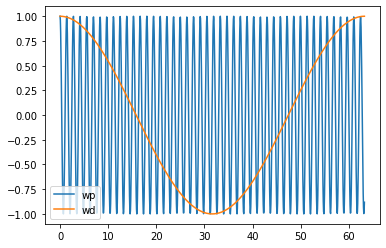

In [ ]:
t = np.linspace(0,2*np.pi/w_d,1000)
x = np.cos(w_p*t)
y = np.cos(w_d*t)

plt.plot(t,x,label="wp")
plt.plot(t,y,label="wd")
plt.legend(loc=3)
plt.show()

Vemos que hay una frecuencia rápida ($\omega_p$) y una lenta ($\omega_d$).
Vamos a escribir las soluciones para las masitas en términos de estas frecuencias:


In [ ]:
t = np.linspace(0,2*np.pi/w_d,1000)
psia = 0.05*np.sin(w_p*t)*np.sin(w_d*t) #masa a
psib = 0.05*np.cos(w_p*t)*np.cos(w_d*t) #masa b


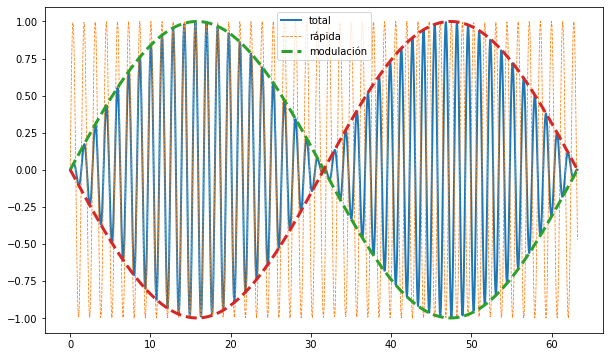

In [ ]:
total = np.sin(w_p*t)*np.sin(w_d*t)
oscilacion_rapida = np.sin(w_p*t)
amplitud_modulada = np.sin(w_d*t)
amplitud_modulada2 = -np.sin(w_d*t)
plt.figure(figsize=(10,6))
plt.plot(t,total, linewidth = 2, label="total")
plt.plot(t,oscilacion_rapida, "--", linewidth=0.8, label="rápida")
plt.plot(t,amplitud_modulada,"--", linewidth=3, label="modulación")
plt.plot(t,amplitud_modulada2,"--", linewidth=3)
plt.legend()
plt.show()

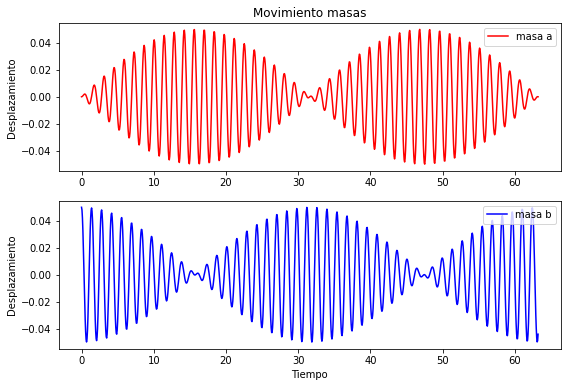

In [ ]:
plt.figure(figsize=(9,6))
plt.subplot(211)
plt.plot(t, psia, "r", label="masa a")
plt.ylabel('Desplazamiento')
plt.legend()
plt.title("Movimiento masas")
plt.subplot(212)
plt.plot(t, psib ,"b", label='masa b')
plt.ylabel('Desplazamiento')
plt.legend(loc=1)
plt.xlabel('Tiempo')
plt.show()

##Animación de las masas

Cuando una es máxima la otra está en su mínimo. Veamoslo en la animación del movimiento:

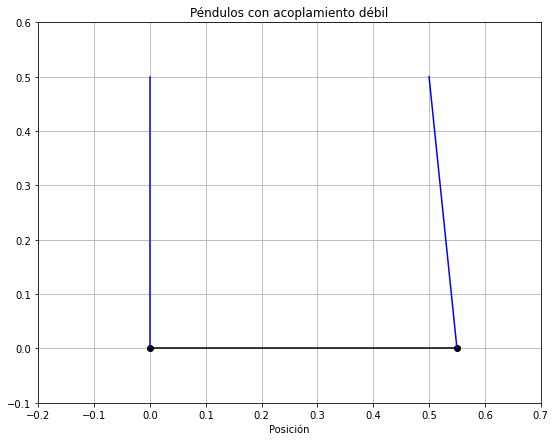

In [ ]:
from matplotlib import animation, rc # librería de animaciones
rc('animation', html='html5') #para poder ver la animacion en formato inline
from IPython.display import HTML

var1=psia #variable que quiero animar
var2=psib #variable que quiero animar


fig, ax = plt.subplots(figsize=(9,7));

ax.set_xlim(-0.2,0.7);
ax.set_ylim(-0.1,0.6);
plt.xlabel('Posición');
plt.title('Péndulos con acoplamiento débil');

line1, = ax.plot([], [],'ok-');
line2, = ax.plot([], [],'b-');
line3, = ax.plot([], [],'b-');

plt.grid();


def animate(i):
    X = [var1[i],0.5+var2[i]]
    Y = [0,0]
    line1.set_data(X,Y)
    line2.set_data([0,var1[i]],[L,0])
    line3.set_data([0.5,0.5+var2[i]],[L,0])
    return (line1,line2,line3)
  
anim2 = animation.FuncAnimation(fig, animate, frames=len(t), interval=2*np.pi/w_d);

anim2


##Energía

Valores medios en un ciclo rápido de $T_a$ y $T_b$ (energía cinética de las masas)

In [ ]:
T_a = m*L**2*(0.0025)*(w_p**2-(w_p**2-w_d**2**2)*np.cos(w_d*t)**2)
T_b = m*L**2*(0.0025)*(w_p**2-(w_p**2-w_d**2**2)*np.sin(w_d*t)**2)

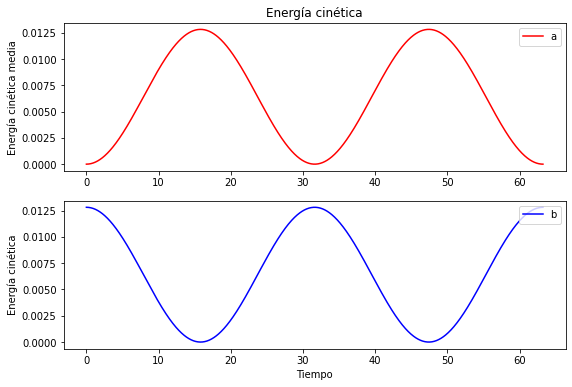

In [ ]:
plt.figure(figsize=(9,6))
plt.subplot(211)
plt.plot(t, T_a,"r",label="a")
plt.ylabel('Energía cinética media')
plt.legend()
plt.title("Energía cinética")
plt.subplot(212)
plt.plot(t, T_b ,"b", label='b')
plt.ylabel('Energía cinética')
plt.legend(loc=1)
plt.xlabel('Tiempo')
plt.show()

Vemos que la energía cinética media (promediando sobre las oscilaciones rápidas) oscila. Vemos que cuando es máxima para una masa, es mínima para la otra: tenemos una **transferencia de la energía cinética**.

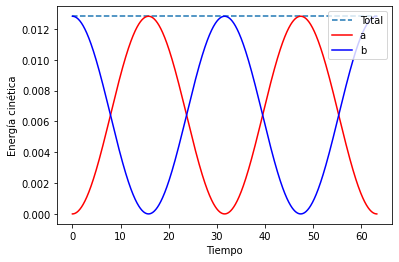

In [ ]:
plt.plot(t, T_a+T_b, "--", label = "Total")
plt.plot(t, T_a,"r",label="a")
plt.plot(t, T_b ,"b", label='b')
plt.ylabel('Energía cinética')
plt.legend(loc=1)
plt.xlabel('Tiempo')
plt.show()